In [89]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

In [90]:
data = pd.read_csv("index_results\index_calculation.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)
data.set_index("Date")
data['Date'] = pd.to_datetime(data.Date)
data['Date'] = data['Date'].dt.date
data['CLOSE'] = data['CLOSE'].apply(lambda x: float(x.replace(',', '.')))

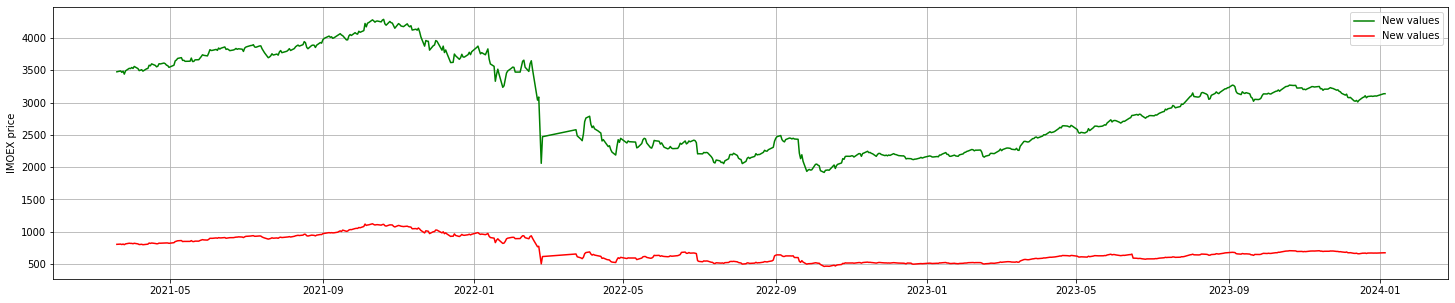

In [91]:
# plot
plt.figure(figsize=(25, 5))

plt.plot(data.Date, data.CLOSE, label = "New values", color = "g") 
plt.plot(data.Date, data.NewClose, label = "New values", color = "r") 

plt.grid(True) 
plt.legend()
plt.ylabel("IMOEX price")

plt.show()

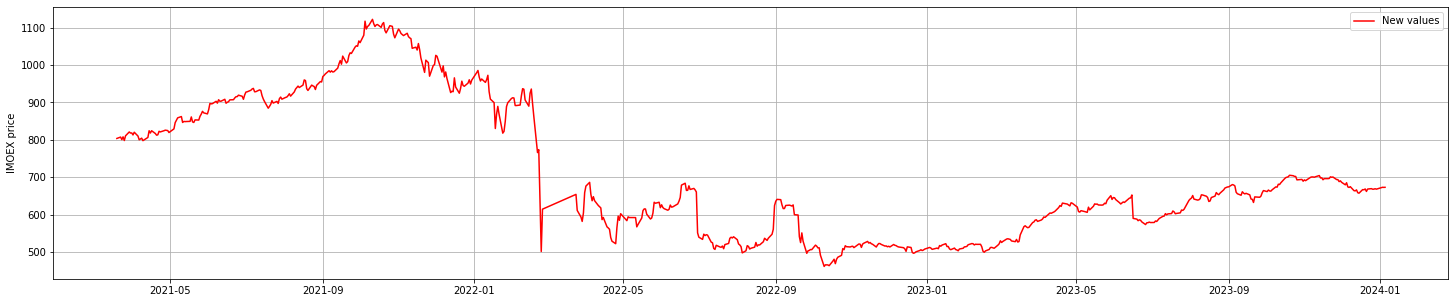

In [92]:
# plot
plt.figure(figsize=(25, 5))

plt.plot(data.Date, data.NewClose, label = "New values", color = "r") 

plt.grid(True) 
plt.legend()
plt.ylabel("IMOEX price")

plt.show()

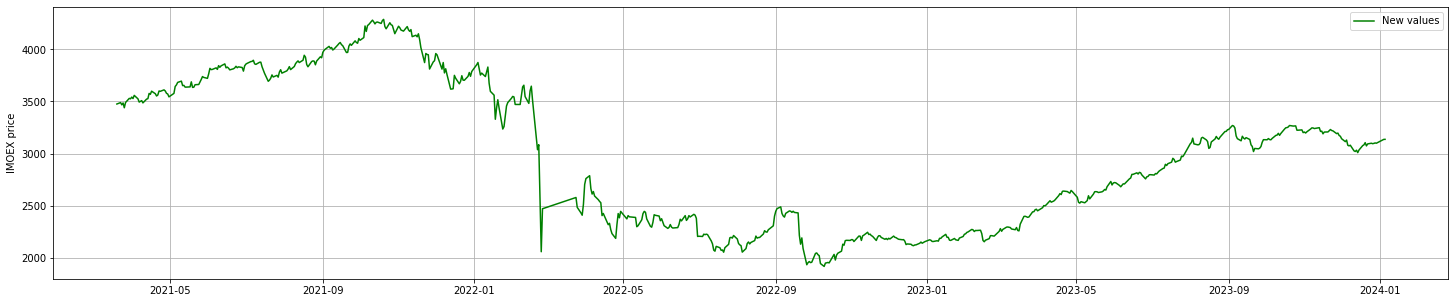

In [93]:
# plot
plt.figure(figsize=(25, 5))

plt.plot(data.Date, data.CLOSE, label = "New values", color = "g") 

plt.grid(True) 
plt.legend()
plt.ylabel("IMOEX price")

plt.show()